# **ch.03 회귀 알고리즘과 모델 규제**
## 03-1 k-최근접 이웃 회귀
### 풀어야 할 문제: 
> ### perch(농어)의 length, height, thickness data를 통해 weight 예측하기
### *k-최근접 이웃 회귀*


k-nearest neighbors regression은 k-nearest neighbors classifier와 비슷하게 작동


&rarr; k-nearest neghbors regression은 가장 가까운 n개의 neighbors의 평균을 구해 새로운 sample의 값을 예측


### *데이터 준비*


우선 length만 가지고 weight 예측 &rarr; feature: length, target: weight


data는 numpy array로 준비

In [2]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

scatter를 그려 data 확인


&rarr; lenght $\propto$ weight

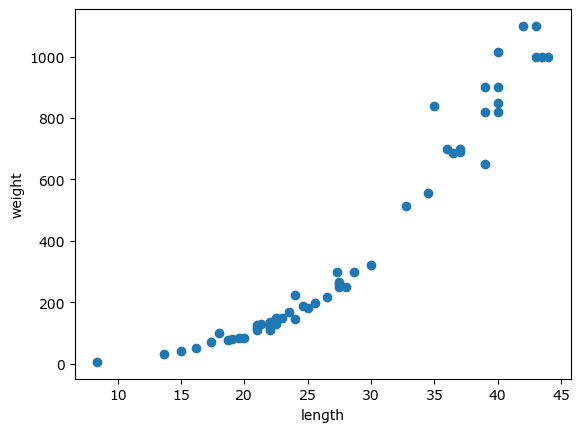

In [3]:
import matplotlib.pyplot as plt

plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

train set, test set 나누기

In [4]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

scikit-learn에 사용하는 train set은 2dim array이어야 함 


&rarr; 하나의 feature만 사용하여 1dim인 data set을 numpy의 reshape() method를 사용하여 2dim으로 바꾸기

In [5]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [6]:
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


### *결정계수($R^2$)*


scikit-learn에서 KNeighborsRegressor import, class object 생성, model train

In [10]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

knr.fit(train_input, train_target)

KNeighborsRegressor()

model score

&rarr; score value: coefficient of determination(결정계수, $R^2$)

In [11]:
knr.score(test_input, test_target)

0.992809406101064

조금 더 직관적인 scoring을 위해 target과 prediction의 절댓값 오차를 평균하여 return하는 mean_absolute_error를 사용


&rarr; 평균적으로 19g 정도 target value와 다름

In [12]:
from sklearn.metrics import mean_absolute_error

test_prediction = knr.predict(test_input)

mae = mean_absolute_error(test_target, test_prediction)

print(mae)

19.157142857142862


### *과대적합 vs 과소적합*


train set으로 scoring하면 어떤 결과가 나올까?

In [13]:
knr.score(train_input, train_target)

0.9698823289099254

train set scoring value > test set scoring value: overfitting  
test set scoring value > train set scoring value: underfitting  
$\therefore$ 위 경우 underfitting


underfitting 해결을 위해 model을 복잡하게 만들기  
(k-nearest neighbors regressor의 경우 neighbor의 수를 줄여 local pattern에 민감하게 반응하도록 함)

In [15]:
knr.n_neighbors = 3

knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [16]:
print(knr.score(train_input, train_target), knr.score(test_input, test_target))

0.9804899950518966 0.9746459963987609
